<a href="https://colab.research.google.com/github/HowardHNguyen/Python/blob/main/California_Flu_Time_Series_Analysis_with_NeuralProphet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Description:**

Influenza surveillance season: Influenza surveillance seasons run from Week 40 through Week 39.
Values include:
2001-2002, 2002-2003, 2003-2004, 2004-2005, 2005-2006, 2006-2007, 2007-2008, 2008-2009, 2009-2010, 2010-2011, 2011-2012, 2012-2013, 2013-2014, 2014-2015, 2015-2016, 2016-2017, 2017-2018.

Date Code: yyyyww

Weekending: Date of the last day included in the CDC MMWR Week (Saturday). Format MM/DD/YYYY.

**Region**

Values:

Bay Area:  Includes Alameda, Contra Costa, Marin, Napa, San Francisco, San Mateo, Santa Clara, Santa Cruz, Solano, and Sonoma counties
California: All California counties

Central: Includes Calaveras, Fresno, Inyo, Kings, Madera, Mariposa, Merced, Mono, Monterey, San Benito, San Joaquin, Stanislaus, Tulare, and Tuolumne counties

Lower Southern: Includes Imperial, Orange, Riverside, San Bernardino, and San Diego counties

Northern: Includes Alpine, Amador, Butte, Colusa, Del Norte, El Dorado, Glenn, Humboldt, Lake, Lassen, Mendocino, Modoc, Nevada, Placer, Plumas, Sacramento, Shasta, Sierra, Siskiyou, Sutter, Tehama, Trinity, Yolo, and Yuba counties

Upper Southern: Includes Kern, Los Angeles, San Luis Obispo, Santa Barbara, and Ventura counties

Note: Not all counties in region have outpatient ILI data providers

**Total_ILI**:
Number of outpatient visits for influenza-like illness (ILI)

**Total_Patients_Seen**:
Total patients seen for any reason

**Percent_ILI**:
Percentage of patients that were due to influenza-like illness

**Number_Providers_Reporting**:
Number of providers reporting data during given week and region

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip uninstall -y torch notebook notebook_shim tensorflow tensorflow-datasets prophet torchaudio torchdata torchtext torchvision

Found existing installation: torch 1.13.1
Uninstalling torch-1.13.1:
  Successfully uninstalled torch-1.13.1
Found existing installation: notebook 6.5.5
Uninstalling notebook-6.5.5:
  Successfully uninstalled notebook-6.5.5
Found existing installation: notebook_shim 0.2.3
Uninstalling notebook_shim-0.2.3:
  Successfully uninstalled notebook_shim-0.2.3
Found existing installation: tensorflow 2.14.0
Uninstalling tensorflow-2.14.0:
  Successfully uninstalled tensorflow-2.14.0
Found existing installation: tensorflow-datasets 4.9.3
Uninstalling tensorflow-datasets-4.9.3:
  Successfully uninstalled tensorflow-datasets-4.9.3
Found existing installation: prophet 1.1.5
Uninstalling prophet-1.1.5:
  Successfully uninstalled prophet-1.1.5
Found existing installation: torchaudio 2.1.0+cu118
Uninstalling torchaudio-2.1.0+cu118:
  Successfully uninstalled torchaudio-2.1.0+cu118
Found existing installation: torchdata 0.7.0
Uninstalling torchdata-0.7.0:
  Successfully uninstalled torchdata-0.7.0
Found

In [3]:
!pip install neuralprophet

  Using cached torch-1.13.1-cp310-cp310-manylinux1_x86_64.whl (887.5 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.7.13 requires torchvision>=0.11, which is not installed.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from neuralprophet import NeuralProphet

In [5]:
# load the dataset
data = pd.read_csv('/content/drive/MyDrive/_Python/flu-ili-byregion-fluseason-v1.csv')

In [6]:
data.head(n=6)

,date,region,Total_ILI,Total_Patients_Seen,Percent_ILI,Number_Providers_Reporting
0,2001-10-06,Bay Area,3,135,2.22,2
1,2001-10-06,California,25,1211,2.06,14
2,2001-10-06,Central,0,0,NaN,0
3,2001-10-06,Lower Southern,2,336,0.60,4
4,2001-10-06,Northern,20,529,3.78,4
5,2001-10-06,Upper Southern,0,211,0.00,4


In [10]:
# remove the California row value
# data = data[data['region'] != 'California']

In [7]:
# Set the 'Date' column as the index and specify the frequency as daily
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

In [8]:
data.head()

,region,Total_ILI,Total_Patients_Seen,Percent_ILI,Number_Providers_Reporting
date,,,,,
2001-10-06,Bay Area,3,135,2.22,2
2001-10-06,California,25,1211,2.06,14
2001-10-06,Central,0,0,NaN,0
2001-10-06,Lower Southern,2,336,0.60,4
2001-10-06,Northern,20,529,3.78,4


In [9]:
# sort the data by the date index
data.sort_index(inplace=True)

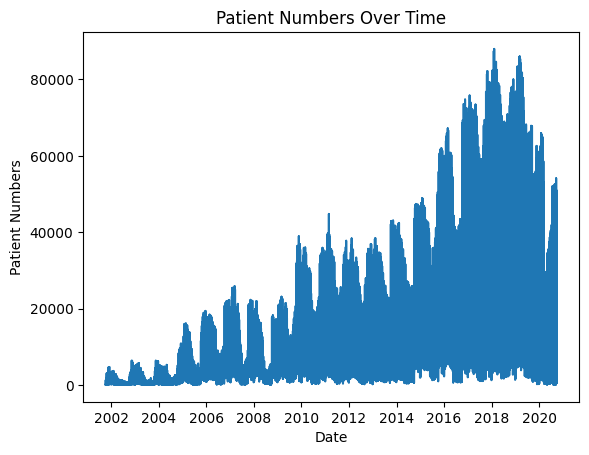

In [10]:
# visualize the data
# Before building the model, it's a good practice to visualize the time series to understand its patterns.
import matplotlib.pyplot as plt

plt.plot(data['Total_Patients_Seen'])
plt.xlabel('Date')
plt.ylabel('Patient Numbers')
plt.title('Patient Numbers Over Time')
plt.show()

In [11]:
data.head(n=2)

,region,Total_ILI,Total_Patients_Seen,Percent_ILI,Number_Providers_Reporting
date,,,,,
2001-10-06,Bay Area,3,135,2.22,2
2001-10-06,California,25,1211,2.06,14


In [12]:
data.shape

(5946, 5)

In [17]:
#data.describe

# **PLOT FOR EACH REGIONS**

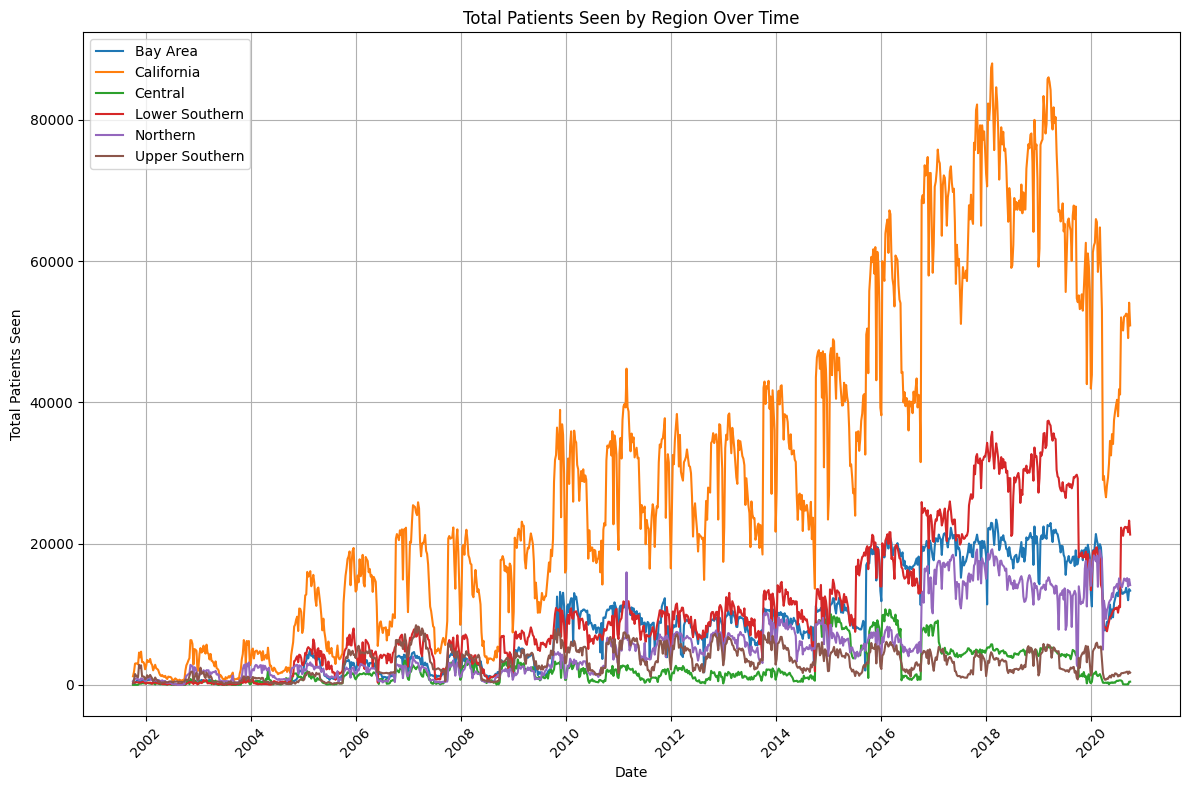

In [13]:
# Convert the index to datetime if it's not already in datetime format
data.index = pd.to_datetime(data.index)

# Extract unique regions
regions = data['region'].unique()

# Create a plot for each region
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

for region in regions:
  region_data = data[data['region'] == region]
  plt.plot(region_data.index, region_data['Total_Patients_Seen'], label=region)

plt.xlabel('Date')
plt.ylabel('Total Patients Seen')
plt.title('Total Patients Seen by Region Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# **PLOT BASED ON VIRUS TYPES**

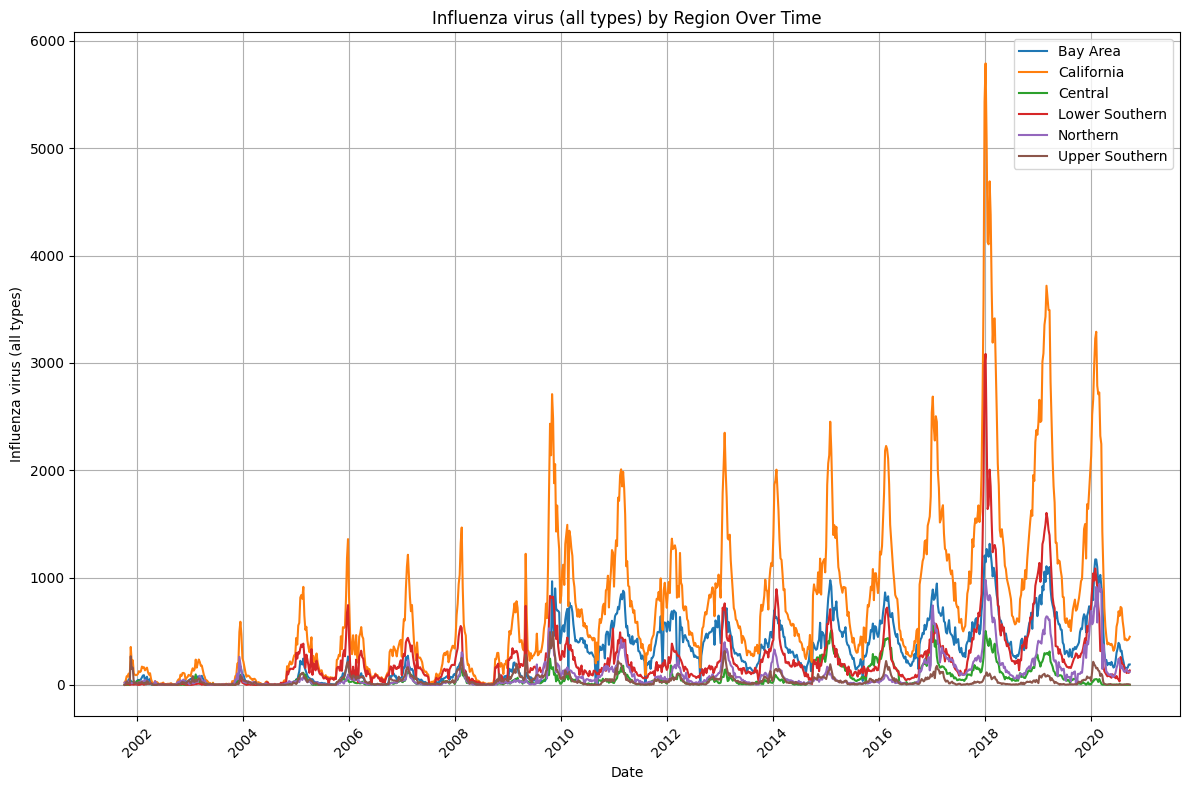

In [14]:
# Convert the index to datetime if it's not already in datetime format
data.index = pd.to_datetime(data.index)

# Extract unique regions
regions = data['region'].unique()

# Create a plot for each region
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

for region in regions:
  region_data = data[data['region'] == region]
  plt.plot(region_data.index, region_data['Total_ILI'], label=region)

plt.xlabel('Date')
plt.ylabel('Influenza virus (all types)')
plt.title('Influenza virus (all types) by Region Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [15]:
data.head(n=2)

,region,Total_ILI,Total_Patients_Seen,Percent_ILI,Number_Providers_Reporting
date,,,,,
2001-10-06,Bay Area,3,135,2.22,2
2001-10-06,California,25,1211,2.06,14


In [16]:
# Pivot the original DataFrame to the desired format
df_transformed = data.groupby(['date', 'region'])['Total_Patients_Seen'].sum().unstack(fill_value=0)

# Reset the index and fill NaN values with 0 if needed
df_transformed.reset_index(inplace=True)
df_transformed.fillna(0, inplace=True)

# If you want to rename the columns as shown in your desired format
df_transformed.columns.name = None

# Display the transformed DataFrame
print(df_transformed)

          date  Bay Area  California  Central  Lower Southern  Northern  \
0   2001-10-06       135        1211        0             336       529   
1   2001-10-13        68        1845        0             343       740   
2   2001-10-20       300        2996        0             320       844   
3   2001-10-27       467        3048        0             374       892   
4   2001-11-03       627        3015        0             363       890   
..         ...       ...         ...      ...             ...       ...   
986 2020-08-29     13747       52568       68           22245     14697   
987 2020-09-05     13106       52460       60           22311     15112   
988 2020-09-12     11981       49104       50           21614     13915   
989 2020-09-19     13559       54111      435           23255     14977   
990 2020-09-26     13326       50902      447           21280     14125   

     Upper Southern  
0               211  
1               694  
2              1532  
3          

In [17]:
df_transformed.head(n=2)

,date,Bay Area,California,Central,Lower Southern,Northern,Upper Southern
0,2001-10-06,135,1211,0,336,529,211
1,2001-10-13,68,1845,0,343,740,694


In [18]:
# create sub df for each region
df_california = df_transformed[['date','California']]
df_bay_area = df_transformed[['date','Bay Area']]
df_central = df_transformed[['date','Central']]
df_lower_southern = df_transformed[['date','Lower Southern']]
df_northern = df_transformed[['date','Northern']]
df_upper_southern = df_transformed[['date','Upper Southern']]

In [19]:
df_california.head()

,date,California
0,2001-10-06,1211
1,2001-10-13,1845
2,2001-10-20,2996
3,2001-10-27,3048
4,2001-11-03,3015


In [20]:
# rename columns
new_column_names = {'date': 'ds', 'California': 'y'}

In [21]:
df_california.rename(columns=new_column_names, inplace=True)

WARNING - (py.warnings._showwarnmsg) - <ipython-input-21-48e7eabeaf51>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_california.rename(columns=new_column_names, inplace=True)

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_california.rename(columns=new_column_names, inplace=True)



In [22]:
df_california.head(n=2)

,ds,y
0,2001-10-06,1211
1,2001-10-13,1845


In [23]:
df_california.columns

Index(['ds', 'y'], dtype='object')

<Axes: xlabel='ds'>

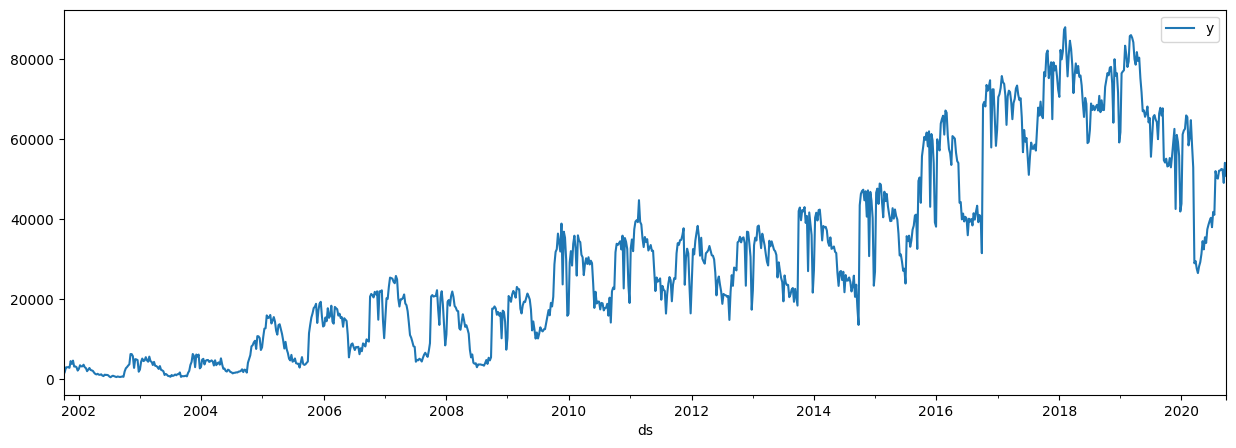

In [24]:
df_california.plot(x="ds", y="y", figsize=(15,5))

# **Setting up the model**

In [25]:
# Import the NeuralProphet class
from neuralprophet import NeuralProphet, set_log_level

# Disable logging messages unless there is an error
set_log_level("ERROR")

# Create a NeuralProphet model with default parameters
m = NeuralProphet()
m.set_plotting_backend("matplotlib")

# Fit the model on the dataset (this might take a bit)
metrics = m.fit(df_california)

Finding best initial lr:   0%|          | 0/225 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

# **Forecast the future**
To predict future values we have to extend our dataframe. In our case we want to create a forecast of the next coming year (meaning 52 weeks). Then we have to run the prediction again on the extended dataframe.

Predicting: 62it [00:00, ?it/s]

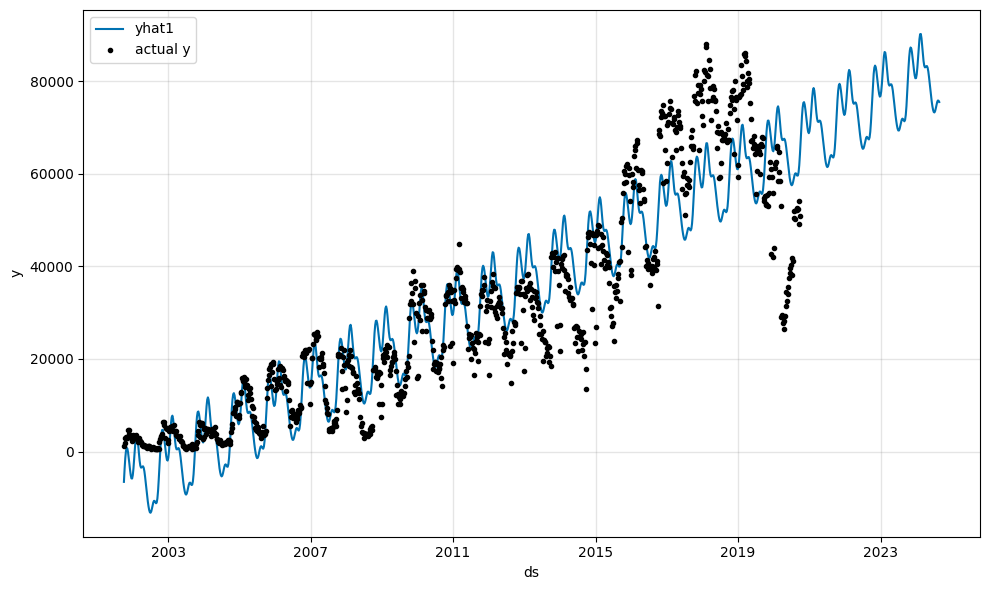

In [39]:
# Create a new dataframe reaching 208 (weeks) ~ 4 years into the future for our forecast, n_historic_predictions also shows historic data
df_future = m.make_future_dataframe(df_california, n_historic_predictions=True, periods=204)

# Predict the future
forecast = m.predict(df_future)

# Visualize the forecast
m.plot(forecast)

The forecast is composed of the following components: trend, yearly and weekly seasonality. They are added together to create the forecast.

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.




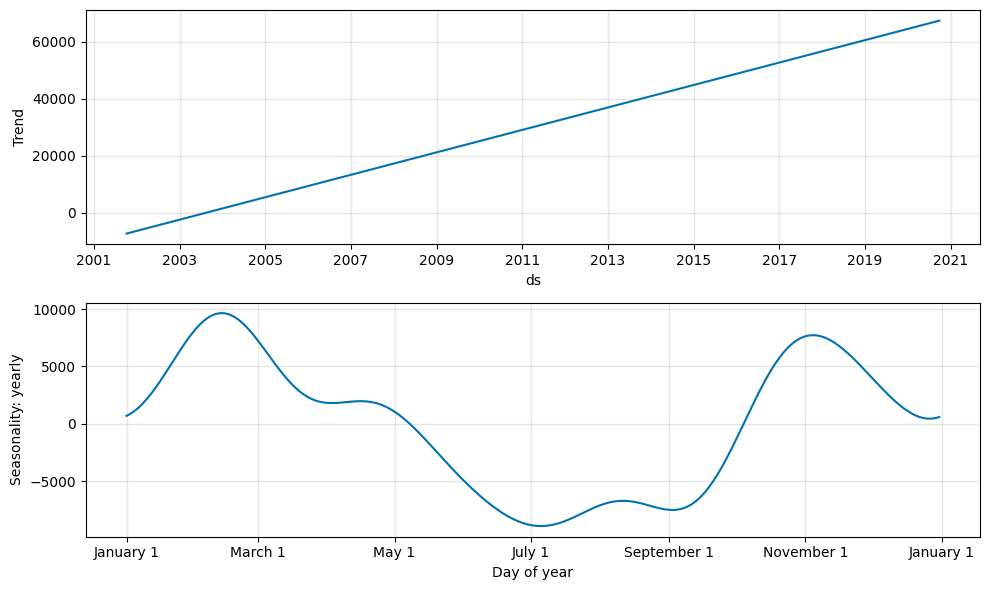

In [40]:
# The forecast is composed of the following components: trend, yearly and
# weekly seasonality. They are added together to create the forecast.

m.plot_parameters(components=["trend", "seasonality"])

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.




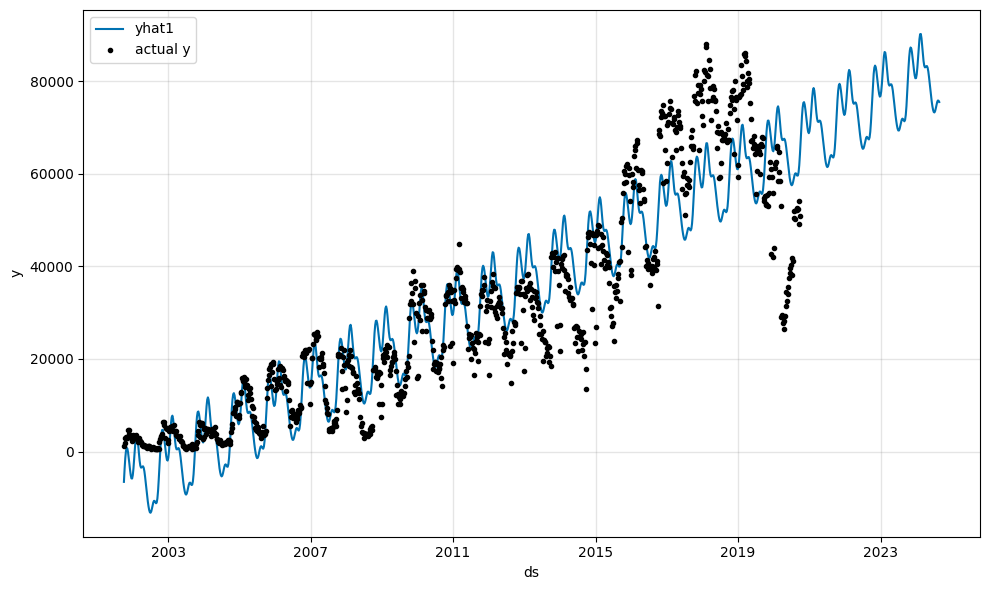

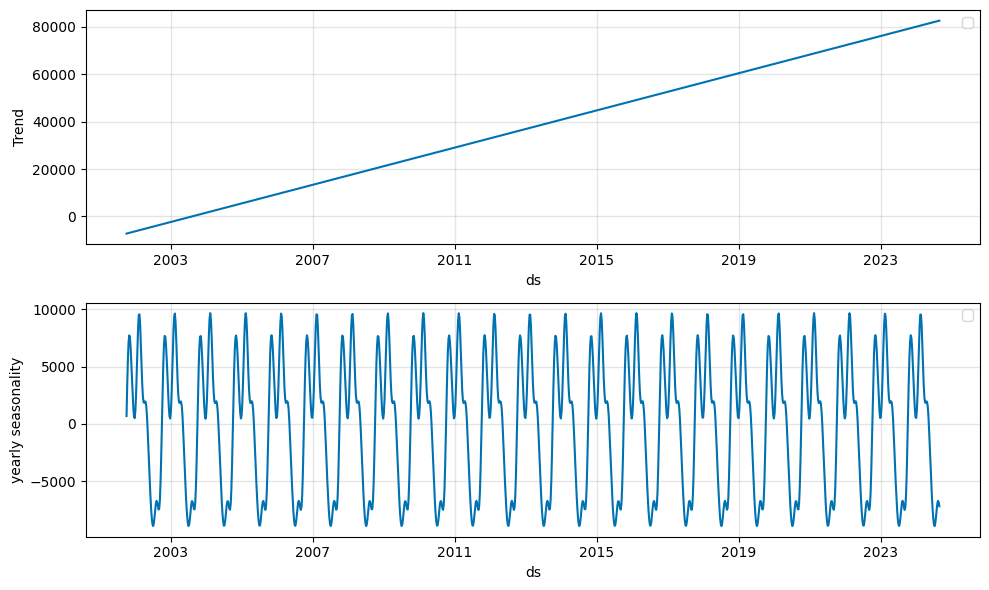

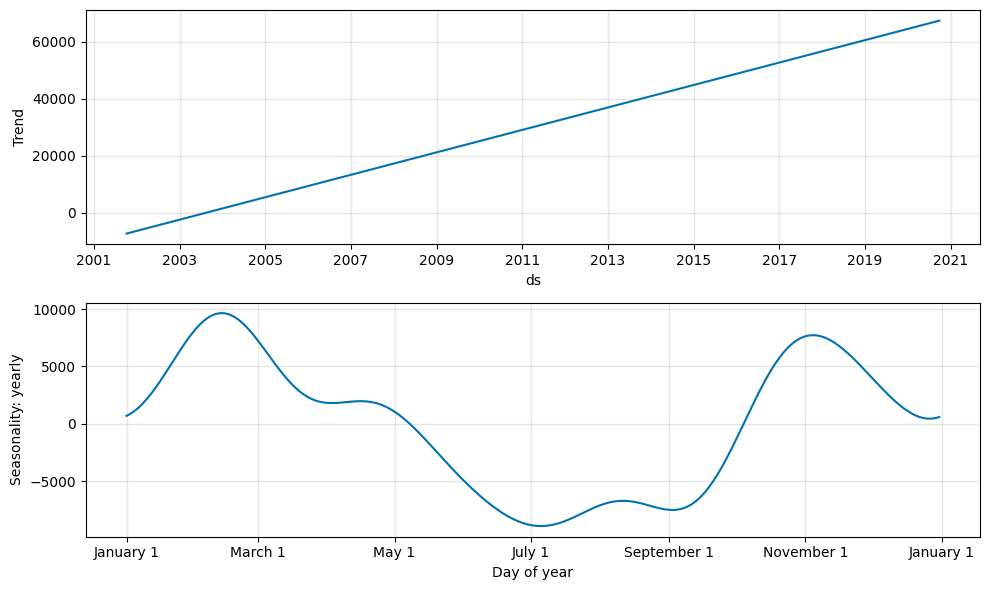

In [41]:
# Visualize our results with the inbuilt plotting functions:

fig_forecast = m.plot(forecast)
fig_components = m.plot_components(forecast)
fig_model = m.plot_parameters()

# **Trends**
In this section we will learn how to use the Trend component to model the trends of a time series.

In [44]:
# Model and prediction
m = NeuralProphet(
    # Disable change trendpoints
    n_changepoints=0,
    # Disable seasonality components
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
)
m.set_plotting_backend("plotly")
metrics = m.fit(df_california)
forecast = m.predict(df_california)
m.plot(forecast)

Finding best initial lr:   0%|          | 0/225 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 62it [00:00, ?it/s]

We already see a linear trend line in the plot which fits well to the data.

Let's explore which trends could be seen in our dataset and how our model automatically fitted to those trends. Later we look into how to fine tune the model trend parameters.

In [45]:
m.plot_components(forecast, components=["trend"])

NeuralProphet uses a classic approach to model the trend as the combination of an offset ** m** and a growth rate k. The trend effect at a time t1 is given by multiplying the growth rate k by the difference (t1 - t0) in time since the starting point t0 on top of the offset m.

trend(t1) = m + k.(t1-t0) = trend(t0) + k.(t1-t0)

After learning about the theory of the trend, we use the model to predict the trend into the future and see how our trend line will continue.

In [47]:
df_future = m.make_future_dataframe(df_california, periods=208, n_historic_predictions=True)

# Predict the future
forecast = m.predict(df_future)

# Visualize the forecast
m.plot(forecast)

Predicting: 62it [00:00, ?it/s]

The linear trend line does continue in the future. Overall there is a slight upward trend in the data. That means the numbers of people got flu in California increases in 2021, 2022, 2023, and 2024.

After learning the basics of the trend in NeuralProphet, let's look into the trend changepoints we disabled earlier. Trend changepoints are points in time where the trend changes. NeuralProphet automatically detects these changepoints and fits a new trend line to the data before and after the changepoint. Let's see how many changepoints NeuralProphet detected.

In [48]:
# Model and prediction
m = NeuralProphet(
    # Use default number of change trendpoints (10)
    # n_changepoints=0,
    # Disable seasonality components
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
)
m.set_plotting_backend("plotly")  # Use matplotlib due to #1235
metrics = m.fit(df_california)
forecast = m.predict(df_california)
m.plot(forecast)

Finding best initial lr:   0%|          | 0/225 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 62it [00:00, ?it/s]

In [49]:
m.plot_parameters(components = ["trend"])

Now the trendline does fit the data way better. We can see that NeuralProphet used the default parameter of 10 changepoints and fit them to our data.

# **Seasonality**
We will explore the seasonality component of NeuralProphet. It allows the model to capture seasonal effects, such as a positive or negative bias for a given day of the week.

In the second section covering Trends, we disabled seasonality. Let us enable the seasonality step by step again, starting with the yearly seasonality. We give it a try and then see what effects it has on the model. We will keep the trend linear with no changepoints for simplicity.

Finding best initial lr:   0%|          | 0/225 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 62it [00:00, ?it/s]

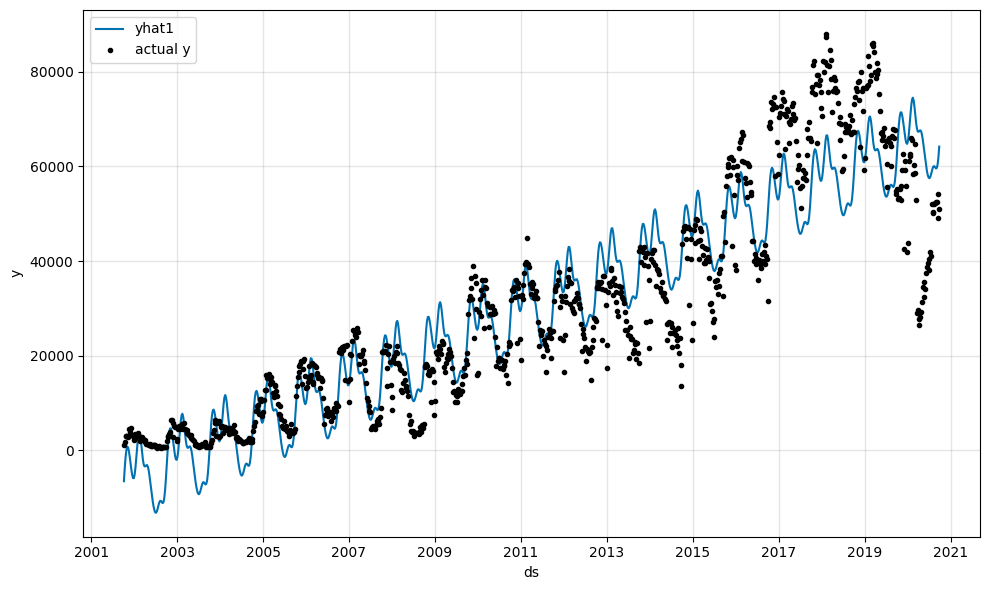

In [50]:
# Disable logging messages unless there is an error
set_log_level("ERROR")

# Model and prediction with yearly seasonality
m = NeuralProphet(
    # Disable trend changepoints
    n_changepoints=0,
    # Disable seasonality components, except yearly
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
)
m.set_plotting_backend("matplotlib")
metrics = m.fit(df_california)
forecast = m.predict(df_california)
m.plot(forecast)

Plotting all components of the forecast we see that the forecast is composed of the trend and the yearly seasonality in an additive way. This means our prediction y^ is the sum of the trend and the seasonality:

Prediction(t) = y^(t) = trend(t) + seasonality_yearly.(t)

We can see this more cleary when we plot the trend and the seasonality components separately.

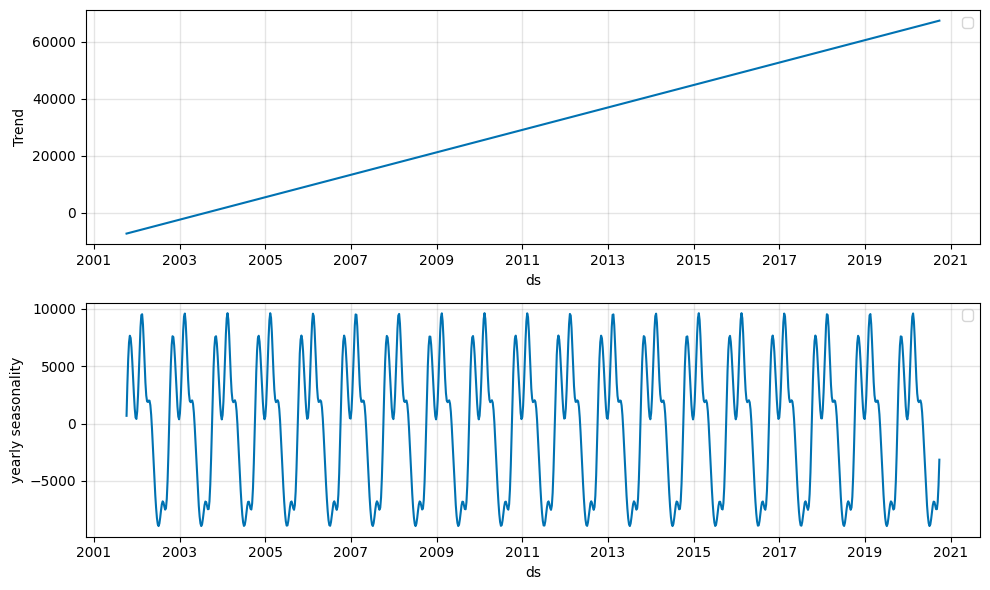

In [51]:
m.plot_components(forecast)

The functions plot_paramters and plot_components allow us to specify which components to plot. So for the next visualizations we will focus on the seasonality alone (respectively not showing the trend).

An alternative way to visualize the seasonality is to plot the model parameters with plot_paramters. In the following visualization the contribution of the seasonality is shown for only one period, here a single year for the yearly seasonality.

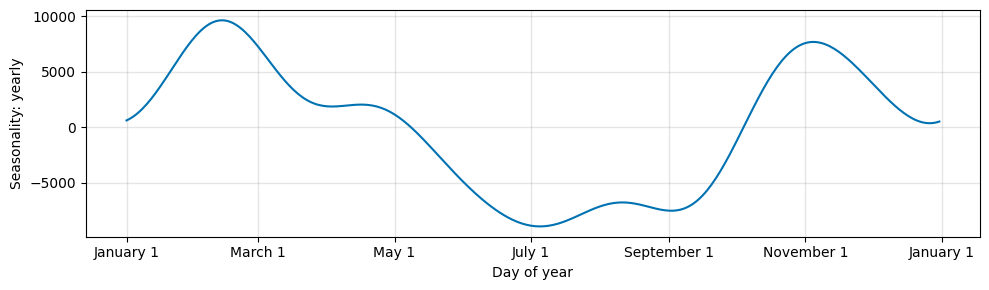

In [52]:
m.plot_parameters(components=["seasonality"])

Based on the line chart result above, we see highest season of flu is February and the second is in November of the year.

Seasonality in NeuralProphet is modeled with the help of Fourier terms. We can think of Fourier terms as the sum of multiple sine and cosine functions with different periodicities and magnitudes. This way NeuralProphet can model multiple seasonalities. The seasonality can be of arbitrary periodicities (length), for example a yearly seasonality with daily data (p = 365.25) or with weekly data (p = 52.18).

You can read more on Fourier terms on Wikipedia and about the detailed inner workings of seasonality in the paper on NeuralProphet under the NeuralProphet model section.

By default, each of the the yearly, weekly and daily seasonalities are automatically enabled if the data is of higher frequency than the respective seasonality and if two full periods of the seasonality are in the training data. For example, daily seasonality is automatically enabled if the data is of hourly resolution and at least two full days are recorded.

We continue by manually enabling the yearly, weekly and daily seasonalities and see what that does.

In [53]:
# Model and prediction
m = NeuralProphet(
    # Disable trend changepoints
    n_changepoints=0,
    # Enable all seasonality components
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
)
m.set_plotting_backend("plotly")
metrics = m.fit(df_california)
forecast = m.predict(df_california)
m.plot(forecast)

Finding best initial lr:   0%|          | 0/225 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 62it [00:00, ?it/s]

In [54]:
m.plot_components(forecast, components=["seasonality"])

Plotting the three seasonalities, we see a flat line for the daily seasonality. This is expected as the data is daily and thus does not have intra-day differences.

For the weekly seasonality we can zoom in or plot a single period with plot_parameters.

In [55]:
m.plot_parameters(components=["seasonality"])

Note: The pattern for daily seasonality is plain noise, as it has no intra-day data to be fitted on. This is one limitation of the Fourier term approach: Though we are able to fit continuous seasonalities, periods between observation samples may be subject to overfitting. This can be addressed by disabling seasonalities or setting them to a lower number of Fourier terms, reducing their complexity.

# **Auto Regression**
Autoregression is a time series model that uses observations from previous time steps as input to a regression equation to predict the value at the next time step.

Finding best initial lr:   0%|          | 0/225 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 62it [00:00, ?it/s]

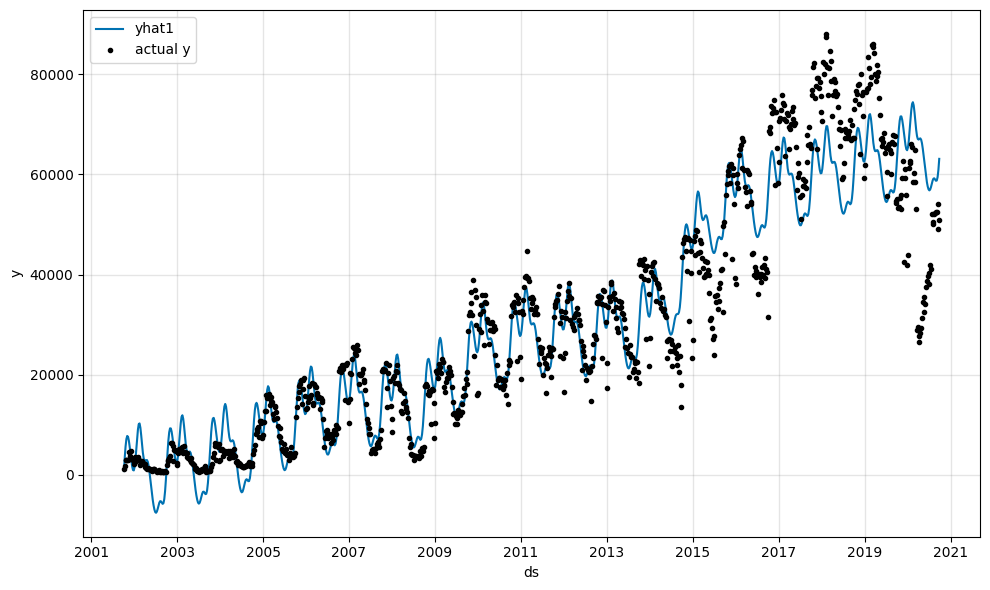

In [56]:
# Model and prediction
m = NeuralProphet(
    n_changepoints=10,
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
)
m.set_plotting_backend("matplotlib")
metrics = m.fit(df_california)
forecast = m.predict(df_california)
m.plot(forecast)

To better understand what the remaining mismatch between our model and the real data is, we can look at the residuals. The residuals are the difference between the model's prediction and the real data. If the model is perfect, the residuals should be zero.

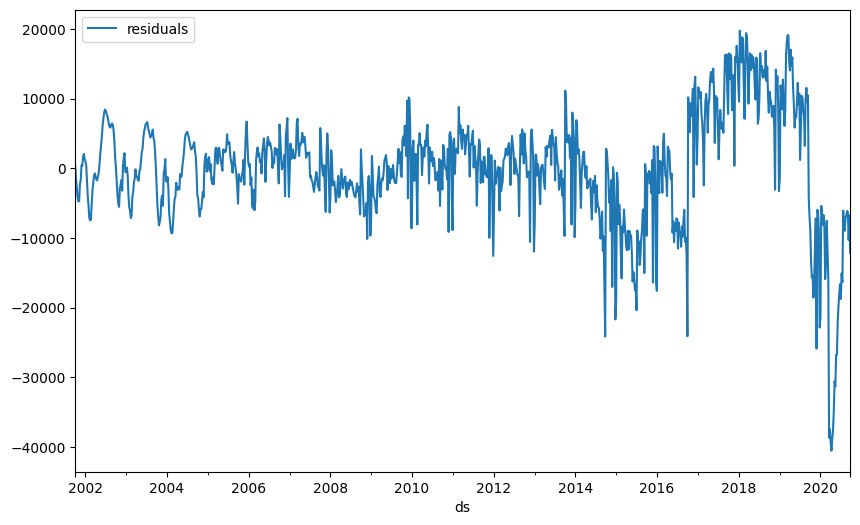

In [57]:
df_residuals = pd.DataFrame({"ds": df_california["ds"], "residuals": df_california["y"] - forecast["yhat1"]})
fig = df_residuals.plot(x="ds", y="residuals", figsize=(10, 6))

Let us explore what a good value for the autoregression would be. Create a autocorrelation chart.

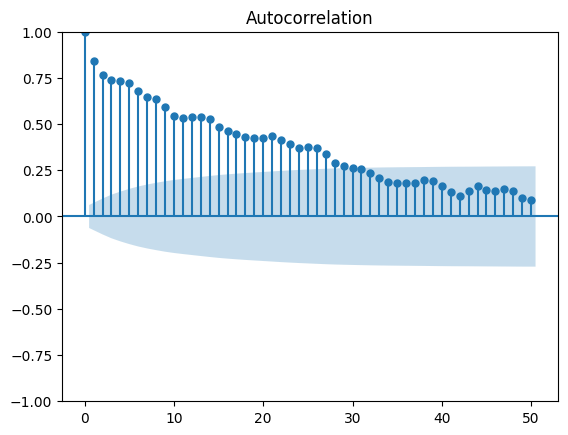

In [58]:
from statsmodels.graphics.tsaplots import plot_acf

plt = plot_acf(df_residuals["residuals"], lags=50)

Now we add autoregression to our model with the n_lags parameter.

Finding best initial lr:   0%|          | 0/225 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 62it [00:00, ?it/s]

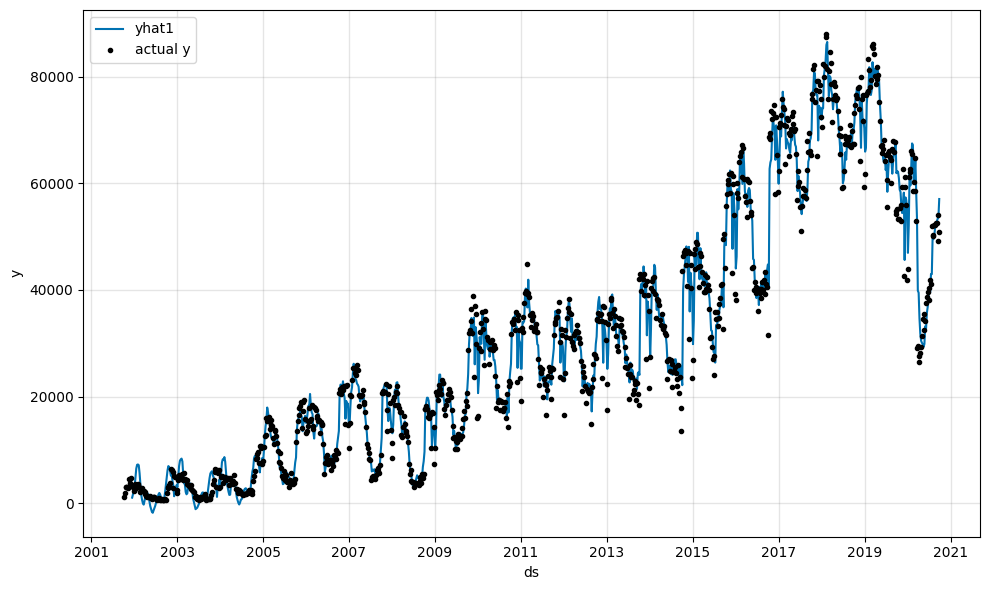

In [60]:
# Model and prediction
m = NeuralProphet(
    # Disable trend changepoints
    n_changepoints=10,
    # Disable seasonality components
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    # Add the autogression
    n_lags=10,
)
m.set_plotting_backend("matplotlib")  # Use matplotlib due to #1235
metrics = m.fit(df_california)
forecast = m.predict(df_california)
m.plot(forecast)

As we can see the forecasting model with autoregression does fit the data a lot better than the base model. Feel free to explore how different numbers of lags n_lags affect the model.

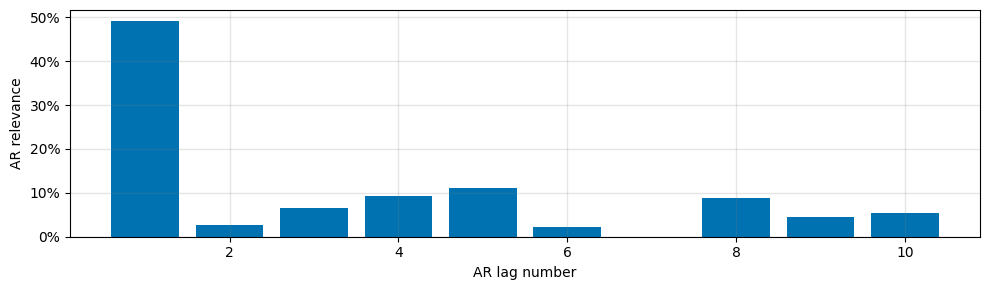

In [61]:
m.plot_parameters(components=["autoregression"])

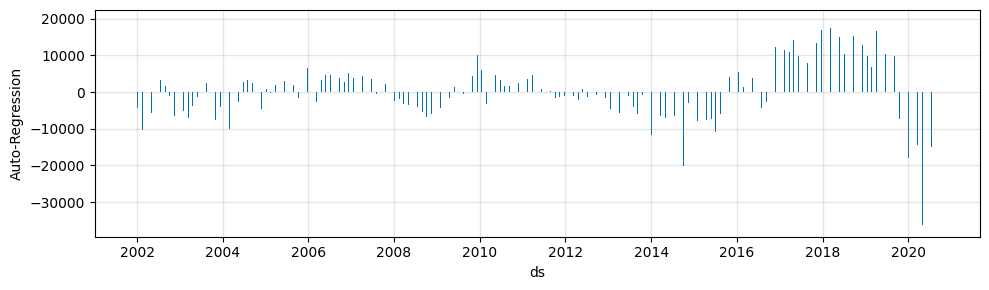

In [62]:
m.plot_components(forecast, components=["autoregression"])

In [65]:
df_california.head(n=2)

,ds,y
0,2001-10-06,1211
1,2001-10-13,1845


In [64]:
metrics

,MAE,RMSE,Loss,RegLoss,epoch
0,79977.203125,97985.210938,0.480647,0.0,0
1,74853.023438,91811.453125,0.437756,0.0,1
2,69449.796875,84949.843750,0.391300,0.0,2
3,63783.695312,78224.367188,0.343577,0.0,3
4,56337.570312,68847.593750,0.283044,0.0,4
...,...,...,...,...,...
190,2645.117920,3766.939697,0.001223,0.0,190
191,2649.044922,3772.404785,0.001226,0.0,191
192,2634.625732,3723.378418,0.001218,0.0,192
193,2649.365723,3773.807617,0.001225,0.0,193


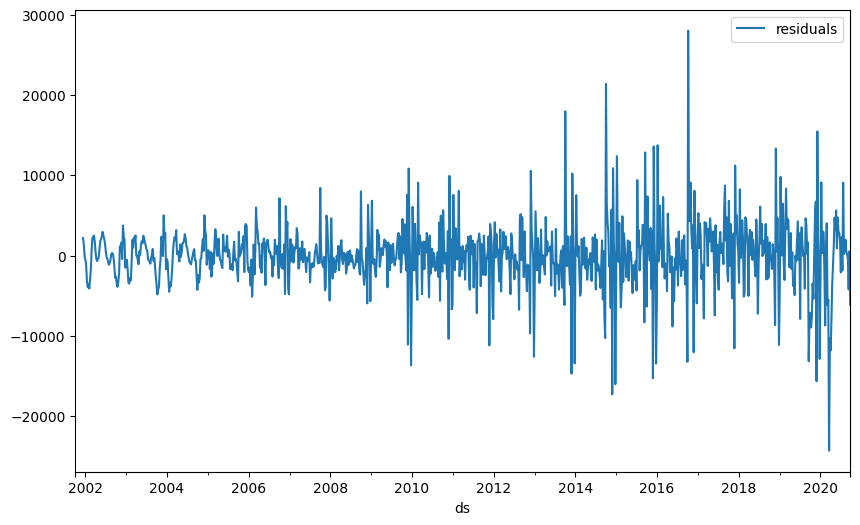

In [66]:
df_residuals = pd.DataFrame({"ds": df_california["ds"], "residuals": df_california["y"] - forecast["yhat1"]})
fig = df_residuals.plot(x="ds", y="residuals", figsize=(10, 6))

# **Events and holidays**
There are two ways to add special events to NeuralProphet: custom events and predefined country holidays. Both can be used to model special occasions and events that are not captured by the other components. These special events can help to improve the model's performance and interpretability.

First we look into country holidays, later we will explore custom events.

NeuralProphet supports a wide range of countries and regions. The full list can be found in the pyholidays documentation, which is internally used for country holiday support.

Country holidays can easily be added with the add_country_holidays function:

In [67]:
m = NeuralProphet()
m.set_plotting_backend("plotly")

m = m.add_country_holidays("US")

metrics = m.fit(df_california)
forecast = m.predict(df_california)
m.plot(forecast)

Finding best initial lr:   0%|          | 0/225 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 62it [00:00, ?it/s]

Effects from special events or holidays may occur sporadically. Such events are modelled analogous to future regressors, with each event e as a binary variable e 𝜖 [0,1], signaling whether the event occurs on the particular day or not.

In [68]:
m.plot_components(forecast)

In [69]:
m.plot_parameters()

# **Uncertainty**
NeuralProphet does support multiple ways to incorporate uncertainty into the forecast. In this section, we will explore the quantile regression uncertainty feature. You can read more on Quantile regression on Wikipedia.

We start with the NeuralProphet base model from the previous section and look at how to add uncertainty modelling to the forecast.

In [70]:
# Model and prediction
m = NeuralProphet()
m.set_plotting_backend("plotly")
metrics = m.fit(df_california)
forecast = m.predict(df_california)
m.plot(forecast)

Finding best initial lr:   0%|          | 0/225 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 62it [00:00, ?it/s]

In comparison to point forecasting, uncertainty modelling predicts an interval of possible values for the forecast. Assuming we want the true value to be within the estimated interval with a probability of 90%, we set the confidence level to be 0.9. We define two quantiles, 0.05 and 0.95, which correspond to the 5th and 95th percentiles of the distribution of the forecast. The 90% confidence interval is then the difference between the 5th and 95th percentiles.

In [71]:
confidence_level = 0.9

boundaries = round((1 - confidence_level) / 2, 2)
# NeuralProphet only accepts quantiles value in between 0 and 1
quantiles = [boundaries, confidence_level + boundaries]

Setup model with uncertainty using the 10th and 90th percentiles.

In [72]:
# Create NeuralProphet model with list of quantiles
m = NeuralProphet(quantiles=quantiles)
m.set_plotting_backend("plotly")

metrics = m.fit(df_california)
forecast = m.predict(df_california)
m.plot(forecast)

Finding best initial lr:   0%|          | 0/225 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 62it [00:00, ?it/s]

For the above method we used a quantile regression model, that uses the pinball loss function to assess the goodness-of-fit. While the defined coverage is guaranteed for the training date, it is not guaranteed for unseen data. More complex methods like Conformal Prediction can be used to guarantee marginal coverage for unseen data:

In [74]:
# evaluate uncertainy on calibration set
train_df, cal_df = m.split_df(df_california, valid_p=0.1)
method = "naive"  # or "cqr" for a more sophisticated method, see uncertainty tutorial
conformal_forecast = m.conformal_predict(train_df, cal_df, alpha=0.1, method=method)
m.highlight_nth_step_ahead_of_each_forecast(1).plot(conformal_forecast)

Predicting: 62it [00:00, ?it/s]

Predicting: 62it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/uncertainty.py:122: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.




# **Validation and Reproducibility**
# Validation

In [75]:
# Model and prediction
m = NeuralProphet()
m.set_plotting_backend("plotly")

Split our dataset into a train and validation set. We will use the validation set to check the performance of our model. The size of the validation set is 20% of our total dataset. Adapt the size with the parameter valid_p in split_df.

In [76]:
df_train, df_val = m.split_df(df_california, valid_p=0.2)

print("Dataset size:", len(df_california))
print("Train dataset size:", len(df_train))
print("Validation dataset size:", len(df_val))

Dataset size: 991
Train dataset size: 793
Validation dataset size: 198


Validation is performed by passing the validation set to the fit method during training. The resulting metrics show the performance of the model compared to our validation set.

In [77]:
metrics = m.fit(df_train, validation_df=df_val, progress=None)
metrics

Finding best initial lr:   0%|          | 0/223 [00:00<?, ?it/s]

,MAE_val,RMSE_val,Loss_val,RegLoss_val,epoch,MAE,RMSE,Loss,RegLoss
0,55713.859375,65769.312500,0.699748,0.0,0,38943.890625,47936.593750,0.327112,0.0
1,52774.046875,62476.488281,0.646043,0.0,1,37339.171875,45958.949219,0.305404,0.0
2,49283.605469,58578.765625,0.583632,0.0,2,35402.414062,43531.605469,0.277952,0.0
3,45221.242188,54032.906250,0.512712,0.0,3,33063.558594,40828.445312,0.246948,0.0
4,40655.726562,48734.898438,0.432953,0.0,4,30456.802734,37397.093750,0.212639,0.0
...,...,...,...,...,...,...,...,...,...
204,13766.081055,18342.230469,0.068832,0.0,204,3466.932617,4446.417480,0.003575,0.0
205,13764.444336,18342.828125,0.068836,0.0,205,3444.354980,4414.804199,0.003536,0.0
206,13764.801758,18341.580078,0.068827,0.0,206,3436.874268,4419.655273,0.003531,0.0
207,13766.484375,18340.494141,0.068819,0.0,207,3432.296143,4396.210938,0.003504,0.0


Here's a breakdown of the key metrics:

*   MAE_val: Mean Absolute Error on the validation dataset.
*   RMSE_val: Root Mean Squared Error on the validation dataset.
*   Loss_val: Total loss on the validation dataset.
*   RegLoss_val: Regularization loss on the validation dataset.
*   epoch: The number of passes through the entire training dataset during the training process. Each epoch consists of one forward pass and one backward pass of all the training examples.
*   MAE: Mean Absolute Error on the training dataset.
*   RMSE: Root Mean Squared Error on the training dataset.
*   Loss: Total loss on the training dataset.
*   RegLoss: Regularization loss on the training dataset.

Each row represents the metrics at a specific epoch during training. The decreasing values of MAE and RMSE indicate that the model is improving in terms of prediction accuracy. The decreasing Loss suggests that the model is learning to minimize the overall error. The absence of regularization loss (RegLoss) indicate that we don't using regularization in this training run.

In [78]:
forecast = m.predict(df_california)
m.plot(forecast)

For advanced validation and testing methods, check out the Test and CrossValidate tutorial in the How to guides section.

# **Reproducibility**
The variability of results comes from SGD finding different optima on different runs. The majority of the randomness comes from the random initialization of weights, different learning rates and different shuffling of the dataloader. We can control the random number generator by setting it's seed:

In [79]:
from neuralprophet import set_random_seed

set_random_seed(10)

This should lead to identical results every time you run the model. Note that you have to explicitly set the random seed to the same random number each time before fitting the model.